<a href="https://colab.research.google.com/github/WambuiKahuthu/MORINGA_WEEK4_IP_AUTOLIB_ANALYSIS/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2021_08_Wambui_Kahuthu_Pandas_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autolib Analysis

##Importing The Libraries To Be Used 

In [3]:
#import pandas library
import pandas as pd
#import numpy library
import numpy as np

##Loading And Previewing Our Datasets

In [4]:
#store the url location of the dataset to the variable url
url = 'http://bit.ly/autolib_dataset'

#read the csv dataset from the assigned variable above and store the dataframe in the variable df
df = pd.read_csv(url)

#display some records of the dataframe
df.head()


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


##Viewing Information About Our Dataset

In [5]:
#process and display information about the dataframe using info() function

df.info()

#this displays the number of rows and columns in the dataset 
#in addition to dispaying the column names, the number of non-null values in each column, the data types of each column, and the count of each data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

##Selecting Data To Be Used

###Ensuring uniformity

Before selecting the data to be used, we ensure uniformity in the column names, to make it easier for us to use them in code 

In [6]:
#Standardize the column names by removing white spaces using strip()function, lowering the cases using lower() function,
#replacing spaces with underscore and removing brackets using replace() function
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '_')

#display the standardized column names  
df.columns

Index(['address', 'cars', 'bluecar_counter', 'utilib_counter',
       'utilib_1_4_counter', 'charge_slots', 'charging_status', 'city',
       'displayed_comment', 'id', 'kind', 'geo_point', 'postal_code',
       'public_name', 'rental_status', 'scheduled_at', 'slots', 'station_type',
       'status', 'subscription_status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

###Dropping irrelevant rows

Since we are examining care usage in the various stations, it is sensible to remove records in which the "rental_status" is not "operational" since there is no car usage in those cases.

In [7]:
#drop rows in which "rental_status" is not "operational" and assign new variable
df_dropped = df.drop(df[(df.rental_status !='operational')].index)

#display the shape of the dataframe with dropped rows 
df_dropped.shape

(4618, 25)

###Dropping irrelevant columns

In [8]:
#drop columns that are irrelevant to the study
df_dropped.drop(['id','rental_status', 'charge_slots', 'charging_status', 'displayed_comment', 'kind', 'geo_point', 'public_name', 
         'scheduled_at', 'slots', 'station_type', 'status', 'subscription_status'],axis =1, inplace=True)
#display some records of the dataframe to see changes 
df_dropped.head()

,address,cars,bluecar_counter,utilib_counter,utilib_1_4_counter,city,postal_code,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,Paris,75015,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,Paris,75014,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,Le Bourget,93350,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,Paris,75013,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,75017,2018,4,8,17,23


In [9]:
#display shape of the the dataframe with dropped rows and columns
df_dropped.shape

(4618, 12)

##Cleaning The Dataset

###Ensuring validity

Some values in the "address" and "city" columns contain characters that make them invalid. We will remove those characters and replace them with appropriate letters.
NB: These characters and their replacements were searched for manually

In [10]:
#replace the special characters with appropriate letters using replace() function and assign new variable
df_valid =df_dropped.replace({"Ã©":'e', 'Ã®':'i', "Ã¨":'e', 'Ã´':'o', 'Ã¢':'a', 'Ã':'E', 'Ã»':'u', 'Ã¼':'u', 'Å':'oe', 'Ã§':'c', 'Ã«':'e', 'Ì':'', 'â':"'", 'Ì':'', 'Ã¯':'i', 'Ã':'I', "Ã":'a'}, regex=True).astype(object)

#display the dataframe to see changes
df_valid

,address,cars,bluecar_counter,utilib_counter,utilib_1_4_counter,city,postal_code,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,Paris,75015,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,Paris,75014,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,Le Bourget,93350,2018,4,3,20,14
3,51 Rue Eugene Oudine,3,3,1,0,Paris,75013,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,75017,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue Menelotte,2,2,0,0,Colombes,92700,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,Paris,75015,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,Paris,75007,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,Fontenay-Sous-Bois,94120,2018,4,4,17,27


In [11]:
#create a function that removes white spaces, converts string values to upper case and replaces double spaces with single space
def clean_records(x):
  if isinstance(x, str):
    return x.strip().upper().replace('  ', ' ')
  else:
    return x

#apply the function to the dataframe and assign dataframe to new variable
df_valid1 = df_valid.applymap(clean_records)

#display a few records to see changes
df_valid1.head()

,address,cars,bluecar_counter,utilib_counter,utilib_1_4_counter,city,postal_code,year,month,day,hour,minute
0,2 AVENUE DE SUFFREN,0,0,0,0,PARIS,75015,2018,4,8,11,43
1,145 RUE RAYMOND LOSSERAND,6,6,0,0,PARIS,75014,2018,4,6,7,24
2,2 AVENUE JOHN FITZGERALD KENNEDY,3,3,0,2,LE BOURGET,93350,2018,4,3,20,14
3,51 RUE EUGENE OUDINE,3,3,1,0,PARIS,75013,2018,4,4,4,37
4,6 AVENUE DE LA PORTE DE CHAMPERRET,3,3,0,0,PARIS,75017,2018,4,8,17,23


###Ensuring accuracy

####accuracy in bluecar_counter

The number of bluecars in each station should be equal to or more than 0 and equal to or less than 7

In [12]:
#find records in which "bluecar_counter" is less than 0 or more than 7
df_inaccurate_bc = df_valid1.loc[(df_valid1['bluecar_counter'] < 0) | (df_valid1['bluecar_counter'] > 7), 'bluecar_counter']
#find number of records in which "bluecar_counter" is less than 0 or more than 7
df_inaccurate_bc.count()

0

####accuracy in utillib_counter

The number of utilibs in each station should be equal to or more than 0 and equal to or less than 4

In [13]:
#find records in which "utilib_counter" is less than 0 or more than 4
df_inaccurate_u = df_valid1.loc[(df_valid1['utilib_counter'] < 0) | (df_valid1['utilib_counter'] > 4), 'bluecar_counter']
#find number of records in which "utilib_counter" is less than 0 or more than 4
df_inaccurate_u.count()

0

####accuracy in utilib_1_4_counter 

The number of utilib 1.4s should be equal to or more than 0 and equal to or less than 5

In [14]:
#find records in which "utilib_1.4_counter" is less than 0 or more than 5
df_inaccurate_u14 = df_valid1.loc[(df_valid1['utilib_1_4_counter'] < 0) | (df_valid1['utilib_1_4_counter'] > 5), 'utilib_counter']
#find number of records in which "utilib_1.4_counter" is less than 0 or more than 5
df_inaccurate_u14.count()

0

####accuracy in year

The year should be 2018

In [15]:
#find records in which "year" is not 2018
df_inaccurate_year = df_valid1.loc[df_valid1['year'] != 2018, 'year']
#find number of records in which year is not 2018
df_inaccurate_year.count()

0

####accuracy in month 

The month should be April (4)

In [16]:
#find records in which "month" is not 4
df_inaccurate_month = df_valid1.loc[df_valid1['month'] != 4, 'month']
#find number of records in which "month" is not 4
df_inaccurate_month.count()

0

since all entries are accurate we move to the next step of ensuring completeness

###Ensuring completeness

In [17]:
#compute the total sum of null values in dataset
df_valid1.isnull().sum().sum()

0

since the dataset contains no null values we move to the next step of ensuring consistency

###Ensuring consistency

In [18]:
#compute sum of duplicated records and dispay results
df_valid1.duplicated().sum()

0

since no record is duplicated we move to the stage of finding outliers

##Finding Outliers

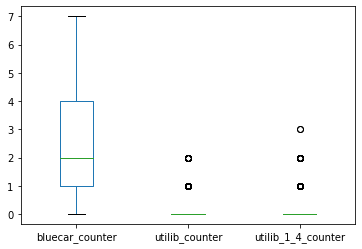

In [19]:
#create a box plot of the variables bluecar_counter, utilib_counter and utilib_1_4_counter
df_valid1.boxplot(column =['bluecar_counter', 'utilib_counter', 'utilib_1_4_counter'], grid = False) 

The outliers the in the utilib and utilib 1.4 columns are as a result of minimal car usage and removing them will lead to invalidate our results; therefore, we keep the outliers in this dataset

##Constructing Data

We will need to compute the total number of cars in a station at any given time by replacing the redundancy in "cars" column with sum of "bluecars", "utilib", and "utilib 1.4". We will also need to construct a "date" column to make it easier for us to sort the dataframe 

###Changing value of "cars"

In [20]:
#change the value of cars in each row
df_valid1['cars'] = (df_valid1['bluecar_counter'] + df_valid1['utilib_counter'] + df_valid1['utilib_1_4_counter'])
#specify the datatype of "cars"
df_valid1.cars = df_valid1.cars.astype(int)
#display some records of dataframe to see changes
df_valid1.head()                  

,address,cars,bluecar_counter,utilib_counter,utilib_1_4_counter,city,postal_code,year,month,day,hour,minute
0,2 AVENUE DE SUFFREN,0,0,0,0,PARIS,75015,2018,4,8,11,43
1,145 RUE RAYMOND LOSSERAND,6,6,0,0,PARIS,75014,2018,4,6,7,24
2,2 AVENUE JOHN FITZGERALD KENNEDY,5,3,0,2,LE BOURGET,93350,2018,4,3,20,14
3,51 RUE EUGENE OUDINE,4,3,1,0,PARIS,75013,2018,4,4,4,37
4,6 AVENUE DE LA PORTE DE CHAMPERRET,3,3,0,0,PARIS,75017,2018,4,8,17,23


###Create "date" column 

In [21]:
#join the "year", "month", "day", "hour", "minute" to create the date column and specify the datatype
df_valid1['date'] = pd.to_datetime(df_valid1[['year', 'month', 'day', 'hour', 'minute']])

#drop the "year", "month", "day", and "minute" columns as they are irrelevant in the analysis
df_valid1.drop(['year', 'month', 'minute'], axis=1, inplace=True)

#display 
df_valid1.head()

,address,cars,bluecar_counter,utilib_counter,utilib_1_4_counter,city,postal_code,day,hour,date
0,2 AVENUE DE SUFFREN,0,0,0,0,PARIS,75015,8,11,2018-04-08 11:43:00
1,145 RUE RAYMOND LOSSERAND,6,6,0,0,PARIS,75014,6,7,2018-04-06 07:24:00
2,2 AVENUE JOHN FITZGERALD KENNEDY,5,3,0,2,LE BOURGET,93350,3,20,2018-04-03 20:14:00
3,51 RUE EUGENE OUDINE,4,3,1,0,PARIS,75013,4,4,2018-04-04 04:37:00
4,6 AVENUE DE LA PORTE DE CHAMPERRET,3,3,0,0,PARIS,75017,8,17,2018-04-08 17:23:00


##Formatting The Dataset

In [22]:
#sort the dataframe by address and date to get the flow of activity and assign new variable to dataframe
df_formatted = df_valid1.sort_values(by=['address', 'date'])
#display the formatted dataframe
df_formatted

,address,cars,bluecar_counter,utilib_counter,utilib_1_4_counter,city,postal_code,day,hour,date
2551,1 ALLEE DE GASCOGNE,6,6,0,0,NANTERRE,92000,8,9,2018-04-08 09:42:00
2209,1 ALLEE PARC LAGRAVERE,5,4,0,1,COLOMBES,92700,1,16,2018-04-01 16:46:00
1968,1 ALLEE PARC LAGRAVERE,3,3,0,0,COLOMBES,92700,1,22,2018-04-01 22:31:00
3047,1 ALLEE PARC LAGRAVERE,7,7,0,0,COLOMBES,92700,5,12,2018-04-05 12:39:00
2562,1 ALLEE PARC LAGRAVERE,6,6,0,0,COLOMBES,92700,6,11,2018-04-06 11:28:00
...,...,...,...,...,...,...,...,...,...,...
1551,QUAI DE SEVRES,5,4,1,0,SEVRES,92310,2,2,2018-04-02 02:23:00
2919,QUAI DE SEVRES,0,0,0,0,SEVRES,92310,4,5,2018-04-04 05:16:00
703,QUAI DE SEVRES,0,0,0,0,SEVRES,92310,5,1,2018-04-05 01:28:00
1285,QUAI DE SEVRES,0,0,0,0,SEVRES,92310,5,7,2018-04-05 07:44:00


##More Construction

Since we will be analysing car usage in the different stations we will need to add columns that show usage of the different cars in the different stations.

In [23]:
#add "cars_activity" column to compute the usage of cars in general
df_formatted['cars_activity'] = df_formatted.groupby(['address'])['cars'].diff().fillna(0)
#specify datatype
df_formatted.cars_activity = df_formatted.cars_activity.astype(int)

#add "bluecar_activity" column to compute usage of bluecars
df_formatted['bluecar_activity'] = df_formatted.groupby(['address'])['bluecar_counter'].diff().fillna(0)
#specify datatype
df_formatted.bluecar_activity = df_formatted.bluecar_activity.astype(int)

#add "utilib_activity" column to compute usage of utilibs
df_formatted['utilib_activity'] = df_formatted.groupby(['address'])['utilib_counter'].diff().fillna(0)
#specify datatype
df_formatted.utilib_activity = df_formatted.utilib_activity.astype(int)

#add "utilib_1_4_activity" to compute usage of utilibs 1.4s
df_formatted['utilib_1_4_activity'] = df_formatted.groupby(['address'])['utilib_1_4_counter'].diff().fillna(0)
#specify datatype
df_formatted.utilib_1_4_activity = df_formatted.utilib_1_4_activity.astype(int)


#display some records of the dataframe to view changes
df_formatted.head()

,address,cars,bluecar_counter,utilib_counter,utilib_1_4_counter,city,postal_code,day,hour,date,cars_activity,bluecar_activity,utilib_activity,utilib_1_4_activity
2551,1 ALLEE DE GASCOGNE,6,6,0,0,NANTERRE,92000,8,9,2018-04-08 09:42:00,0,0,0,0
2209,1 ALLEE PARC LAGRAVERE,5,4,0,1,COLOMBES,92700,1,16,2018-04-01 16:46:00,0,0,0,0
1968,1 ALLEE PARC LAGRAVERE,3,3,0,0,COLOMBES,92700,1,22,2018-04-01 22:31:00,-2,-1,0,-1
3047,1 ALLEE PARC LAGRAVERE,7,7,0,0,COLOMBES,92700,5,12,2018-04-05 12:39:00,4,4,0,0
2562,1 ALLEE PARC LAGRAVERE,6,6,0,0,COLOMBES,92700,6,11,2018-04-06 11:28:00,-1,-1,0,0


##Exporting And Loading The Prepared Dataset

In [24]:
#export our dataframe into a csv file 
df_formatted.to_csv('autolibdataset.csv')

#load the dataframe using exported csv file and assign the dataframe a new name that will be used in analysis
autolib = pd.read_csv('autolibdataset.csv')

#specify the column names
autolib.columns = ['index', 'station', 'cars', 'bluecar_counter', 'utilib_counter', 'utilib_1_4_counter', 'city', 'postal_code', 'day', 'hour', 'date', 'cars_activity', 'bluecar_activity', 'utilib_activity', 'utilib_1_4_activity' ]

#drop index column
autolib.drop(['index'], axis=1, inplace=True)

#display a few records of the dataframe
autolib.head()

,station,cars,bluecar_counter,utilib_counter,utilib_1_4_counter,city,postal_code,day,hour,date,cars_activity,bluecar_activity,utilib_activity,utilib_1_4_activity
0,1 ALLEE DE GASCOGNE,6,6,0,0,NANTERRE,92000,8,9,2018-04-08 09:42:00,0,0,0,0
1,1 ALLEE PARC LAGRAVERE,5,4,0,1,COLOMBES,92700,1,16,2018-04-01 16:46:00,0,0,0,0
2,1 ALLEE PARC LAGRAVERE,3,3,0,0,COLOMBES,92700,1,22,2018-04-01 22:31:00,-2,-1,0,-1
3,1 ALLEE PARC LAGRAVERE,7,7,0,0,COLOMBES,92700,5,12,2018-04-05 12:39:00,4,4,0,0
4,1 ALLEE PARC LAGRAVERE,6,6,0,0,COLOMBES,92700,6,11,2018-04-06 11:28:00,-1,-1,0,0


In [25]:
#display information about the dataframe
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4618 entries, 0 to 4617
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   station              4618 non-null   object
 1   cars                 4618 non-null   int64 
 2   bluecar_counter      4618 non-null   int64 
 3   utilib_counter       4618 non-null   int64 
 4   utilib_1_4_counter   4618 non-null   int64 
 5   city                 4618 non-null   object
 6   postal_code          4618 non-null   int64 
 7   day                  4618 non-null   int64 
 8   hour                 4618 non-null   int64 
 9   date                 4618 non-null   object
 10  cars_activity        4618 non-null   int64 
 11  bluecar_activity     4618 non-null   int64 
 12  utilib_activity      4618 non-null   int64 
 13  utilib_1_4_activity  4618 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 505.2+ KB


In [26]:
#change "date" data type to datetime
autolib['date']=pd.to_datetime(autolib['date'])

#change "postal_code" data type to object
autolib.postal_code = autolib.postal_code.astype(str)

#check data types to verify change
autolib.dtypes

station                        object
cars                            int64
bluecar_counter                 int64
utilib_counter                  int64
utilib_1_4_counter              int64
city                           object
postal_code                    object
day                             int64
hour                            int64
date                   datetime64[ns]
cars_activity                   int64
bluecar_activity                int64
utilib_activity                 int64
utilib_1_4_activity             int64
dtype: object

##Basic Computations

###Count of stations


In [27]:
#create a list of distinct values in "station"
stations = autolib['station'].unique().tolist()

#find number of distinct stations
x = len(stations)

#print number of stations
print("The number of stations is "+str(x)) 

The number of stations is 1025


###Count of cities

In [28]:
#create a list of distinct values in "city"
cities = autolib['city'].unique().tolist()

#find number of distinct stations
y = len(cities)

#print the number of cities
print("The number of cities is "+str(y)) 

The number of cities is 83


###Count of postal codes

In [29]:
#create a list of distinct postal codes
postal_codes = autolib['postal_code'].unique().tolist()

#find number of distinct postal codes
z =len(postal_codes)

#print number of postalcodes
print("The number of postal codes is "+str(z))

The number of postal codes is 103


###Count of days

In [30]:
#create a list of distinct days
days = autolib['day'].unique().tolist()

#find number of distinct days and assign variable
days_number = len(days)

#print number of days
print("The number of days is "+str(days_number))

The number of days is 9


##Answering Questions

NB: A positive in the _activity columns means a return and a negative means a pick up.

###Question one

a. What is the most popular hour of the day for picking up bluecars in Paris?

In [31]:
#specify the areas of interest and their conditions then group the dataframe by hour and find the sum of the bluecar_activity then convert to dataframe
pick_hour_paris = autolib[(autolib.city == 'PARIS') & (autolib.bluecar_activity < 0)].groupby('hour')['bluecar_activity'].sum().reset_index()

#find records with the minimum value of bluecar activity
most_pick_hour_paris = pick_hour_paris[pick_hour_paris['bluecar_activity']==pick_hour_paris['bluecar_activity'].min()]

#display the hour with the minimum value of bluecar_activity
print(most_pick_hour_paris)

    hour  bluecar_activity
21    21              -109


b. What is the most popular hour of the day for returning bluecars in Paris?

In [32]:
#specify the areas of interest and their conditions then group the dataframe by hour and find the sum of the bluecar_activity then convert to dataframe
return_hour_paris = autolib[(autolib.city == 'PARIS') & (autolib.bluecar_activity > 0)].groupby('hour')['bluecar_activity'].sum().reset_index()

#find records with the maximum value of bluecar activity
most_return_hour_paris = return_hour_paris[return_hour_paris['bluecar_activity']==return_hour_paris['bluecar_activity'].max()]

#display record with the maximum value of bluecar_activity
print(most_return_hour_paris)

    hour  bluecar_activity
9      9               101
12    12               101


c. What is the most popular station for bluecars in Paris?

In [33]:
#specify the areas of interest and their conditions then group the dataframe by station and find the sum of the bluecar_activity then convert to dataframe
pop_station_paris = autolib[(autolib.city == 'PARIS') & (autolib.bluecar_activity < 0)].groupby('station')['bluecar_activity'].sum().reset_index()

#find records in which the sum of bluecars_activity is minimum
most_pop_station_paris = pop_station_paris[pop_station_paris['bluecar_activity']==pop_station_paris['bluecar_activity'].min()]

#display records with the minimum value of bluecars_activity
print(most_pop_station_paris)

                               station  bluecar_activity
418  8 AVENUE DE LA PORTE DE MONTROUGE               -19


d. What is the least popular station for bluecars in Paris?

In [34]:
#specify the areas of interest and their conditions then group the dataframe by station and find the sum of the bluecar_activity then convert to dataframe
pop_station_paris = autolib[(autolib.city == 'PARIS') & (autolib.bluecar_activity < 0)].groupby('station')['bluecar_activity'].sum().reset_index()

#find records in which the sum of bluecars_activity is maximum
least_pop_station_paris = pop_station_paris[pop_station_paris['bluecar_activity']==pop_station_paris['bluecar_activity'].max()]

#display records with the maximum value of bluecars_activity
print(least_pop_station_paris)

                            station  bluecar_activity
2                  1 AVENUE MARCEAU                -1
4             1 PLACE SAINT GERVAIS                -1
9                       1 RUE DANTE                -1
11               1 RUE DE SCHOMBERG                -1
13      1 RUE DES NONNAINS D'HYERES                -1
..                              ...               ...
438       87 BOULEVARD BEAUMARCHAIS                -1
443             9 BOULEVARD BOURDON                -1
447                  9 RUE LOBINEAU                -1
448  91 RUE DU FAUBOURG SAINT-DENIS                -1
451              92 RUE DES ORTEAUX                -1

[83 rows x 2 columns]


e. What is the least popular hour for picking blue cars in paris

In [35]:
#specify the areas of interest and their conditions then group the dataframe by hour and find the sum of the bluecar_activity then convert to dataframe
pick_hour_paris = autolib[(autolib.city == 'PARIS') & (autolib.bluecar_activity < 0)].groupby('hour')['bluecar_activity'].sum().reset_index()

#find records with the maximum value of bluecar activity
least_pick_hour_paris = pick_hour_paris[pick_hour_paris['bluecar_activity']==pick_hour_paris['bluecar_activity'].max()]

#display the hour with the maximum value of bluecar_activity
print(least_pick_hour_paris)

   hour  bluecar_activity
9     9               -42


f. What is the least popular hour for returning bluecars in Paris?

In [36]:
#specify the areas of interest and their conditions then group the dataframe by hour and find the sum of the bluecar_activity then convert to dataframe
return_hour_paris = autolib[(autolib.city == 'PARIS') & (autolib.bluecar_activity > 0)].groupby('hour')['bluecar_activity'].sum().reset_index()

#find records with the minimum value of bluecar activity
least_return_hour_paris = return_hour_paris[return_hour_paris['bluecar_activity']==return_hour_paris['bluecar_activity'].min()]

#display record with the minimum value of bluecar_activity
print(least_return_hour_paris)

   hour  bluecar_activity
1     1                40


What is the average pick ups per day in Paris?

In [37]:
#find the sum of pickups for the 9 days in Paris
pick_total_paris = autolib.loc[(autolib['city'] == 'PARIS') & (autolib['bluecar_activity'] < 0), 'bluecar_activity'].sum()

#calculate the average number of pick ups per day   
avg_pick_day_paris = ((pick_total_paris/days_number)*-1).round(0)

#display average number of pick ups per day in Paris
print("The average number of pick ups per day is "+str(avg_pick_day_paris)) 

The average number of pick ups per day is 181.0


###Question two

a. What is the most popular hour of the day for picking up bluecars in the country?

In [38]:
#specify the areas of interest and their conditions then group the dataframe by hour and find the sum of the bluecar_activity then convert to dataframe
pick_hour = autolib[(autolib.bluecar_activity < 0)].groupby('hour')['bluecar_activity'].sum().reset_index()

#find records with the minimum value of bluecar activity
most_pick_hour = pick_hour[pick_hour['bluecar_activity']==pick_hour['bluecar_activity'].min()]

#display the hour with the minimum value of bluecar_activity
print(most_pick_hour)

    hour  bluecar_activity
21    21              -190


b.What is the most popular hour for returning bluecars in the country?

In [39]:
#specify the areas of interest and their conditions then group the dataframe by hour and find the sum of the bluecar_activity then convert to dataframe
return_hour = autolib[(autolib.bluecar_activity > 0)].groupby('hour')['bluecar_activity'].sum().reset_index()

#find records with the maximum value of bluecar activity
most_return_hour = return_hour[return_hour['bluecar_activity']==return_hour['bluecar_activity'].max()]

#display the hour with the minimum value of bluecar_activity
print(most_return_hour)

   hour  bluecar_activity
3     3               158


###Question three

What is the most popular station for bluecars in the country?




a. Overall

In [40]:
#specify the areas of interest and their conditions then group the dataframe by postal code and station and find the sum of the bluecar_activity then convert to dataframe
pop_station = autolib[(autolib.bluecar_activity < 0)].groupby(['postal_code','station'])['bluecar_activity'].sum().reset_index()

#find records in which the sum of bluecars_activity is minimum
most_pop_station = pop_station[pop_station['bluecar_activity']==pop_station['bluecar_activity'].min()]

#display records with the minimum value of bluecars_activity
print(most_pop_station)

    postal_code                            station  bluecar_activity
256       75014  8 AVENUE DE LA PORTE DE MONTROUGE               -19


b. At the most popular picking hour

In [41]:
#create a list of most popular picking hour
pop_hour_list = most_pick_hour['hour'].tolist()

#specify the areas of interest and their conditions then group the dataframe by station and postal code and find the sum of the bluecar_activity then convert to dataframe
station_pophour = autolib[(autolib.hour.isin(pop_hour_list)) & (autolib.bluecar_activity<0)].groupby(['postal_code',"station"])['bluecar_activity'].sum().reset_index()

#find records in which the sum of bluecars_activity is minimum
popstation_pophour = station_pophour[station_pophour['bluecar_activity'] ==station_pophour['bluecar_activity'].min()]

#display records with the minimum value of bluecars_activity
print(popstation_pophour)

   postal_code                    station  bluecar_activity
5        75008            19 RUE TRONCHET                -6
18       75013  47 BOULEVARD DE L'HOPITAL                -6


###Question four

What postal code is the most popular for picking up bluecars?

a. Overall

In [42]:
#specify the areas of interest and their conditions then group the dataframe by postal code and station and find the sum of the bluecar_activity then convert to dataframe
pop_pcode = autolib[(autolib.bluecar_activity < 0)].groupby(['postal_code'])['bluecar_activity'].sum().reset_index()

#find records in which the sum of bluecars_activity is minimum
most_pop_pcode = pop_pcode[pop_pcode['bluecar_activity']==pop_pcode['bluecar_activity'].min()]

#display records with the minimum value of bluecars_activity
print(most_pop_pcode)

   postal_code  bluecar_activity
14       75015              -175


b. At the most popular picking hour

In [43]:
#create a list of most popular picking hour
pop_hour_list = most_pick_hour['hour'].tolist()

#specify the areas of interest and their conditions then group the dataframe by postal code and find the sum of the bluecar_activity then convert to dataframe
pcode_pophour = autolib[(autolib.hour.isin(pop_hour_list)) & (autolib.bluecar_activity<0)].groupby(["postal_code"])['bluecar_activity'].sum().reset_index()

#find records in which the sum of bluecars_activity is minimum
poppcode_pophour = pcode_pophour[pcode_pophour['bluecar_activity'] == pcode_pophour['bluecar_activity'].min()]

#display records with the minimum value of bluecars_activity
print(poppcode_pophour)

  postal_code  bluecar_activity
6       75013               -17


###Question five

Does the most popular station belong to the most popular postal code  

a. Overall

In [44]:
#check if postal code in the most popular postal code is in the most popular station
most_pop_pcode.assign(in_most_pop_station=most_pop_pcode.postal_code.isin(most_pop_station.postal_code).astype(str))


,postal_code,bluecar_activity,in_most_pop_station
14,75015,-175,False


b. At the most popular picking hour

In [45]:
#check if the most popular postal code at the most popular picking hour is in the most popular station at the most popular picking hour
poppcode_pophour.assign(in_popstation_pophour=poppcode_pophour.postal_code.isin(popstation_pophour.postal_code).astype(str))


,postal_code,bluecar_activity,in_popstation_pophour
6,75013,-17,True


###Question six

What is the average number of bluecar pick ups per day in the country?

In [46]:
#find the sum of pickups for the 9 days in the country
pick_total = autolib.loc[(autolib['bluecar_activity'] < 0), 'bluecar_activity'].sum()

#calculate the average number of pick ups per day   
avg_pick_day = ((pick_total/days_number)*-1).round(0)

#display average number of pick ups per day 
print("The average number of pick ups per day is "+str(avg_pick_day)) 

The average number of pick ups per day is 328.0


###Question seven

Do the results change if we consider utilib and utilib 1.4?

a. Most popular hour of the day for picking up utilibs in the country

In [51]:
#specify the areas of interest and their conditions then group the dataframe by hour and find the sum of the utilib_activity then convert to dataframe
pick_hour_u1 = autolib[(autolib.utilib_activity < 0)].groupby('hour')['utilib_activity'].sum().reset_index()

#find records with the minimum value of utilib_activity
most_pick_hour_u1 = pick_hour_u1[pick_hour_u1['utilib_activity']==pick_hour_u1['utilib_activity'].min()]

#display the hour with the minimum value of utilib_activity
print(most_pick_hour_u1)

    hour  utilib_activity
23    23              -14


b. Average number of utilibs picked up per day in the country 

In [49]:
#find the sum of pickups for the 9 days in the country
pick_totalu1 = autolib.loc[(autolib['utilib_activity'] < 0), 'utilib_activity'].sum()

#calculate the average number of pick ups per day   
avg_pick_dayu1 = ((pick_totalu1/days_number)*-1).round(0)

#display average number of pick ups per day 
print("The average number of pick ups per day is "+str(avg_pick_dayu1)) 

The average number of pick ups per day is 21.0


c. Most popular station for picking up utilib in the country

In [57]:
#specify the areas of interest and their conditions then group the dataframe by station and find the sum of the utilib_activity then convert to dataframe
pop_stationu1 = autolib[(autolib.utilib_activity < 0)].groupby(['station'])['utilib_activity'].sum().reset_index()

#find records in which the sum of utilib_activity is minimum
most_pop_stationu1 = pop_stationu1[pop_stationu1['utilib_activity']==pop_stationu1['utilib_activity'].min()]

#display records with the minimum value of utilib_activity
print(most_pop_stationu1)

             station  utilib_activity
128  54 RUE HERICART               -3


d. Most popular hour for picking up utilib 1.4 in the country

In [53]:
#specify the areas of interest and their conditions then group the dataframe by hour and find the sum of the utilib_1_4_activity then convert to dataframe
pick_hour_u2 = autolib[(autolib.utilib_1_4_activity < 0)].groupby('hour')['utilib_1_4_activity'].sum().reset_index()

#find records with the minimum value of utilib_1_4_activity
most_pick_hour_u2 = pick_hour_u2[pick_hour_u2['utilib_1_4_activity']==pick_hour_u2['utilib_1_4_activity'].min()]

#display the hour with the minimum value of utilib_1_4_activity
print(most_pick_hour_u2)

    hour  utilib_1_4_activity
11    11                  -24
18    18                  -24


e. Average number of utilib 1.4s picked up per day in the country

In [54]:
#find the sum of pickups for the 9 days in the country
pick_totalu2 = autolib.loc[(autolib['utilib_1_4_activity'] < 0), 'utilib_1_4_activity'].sum()

#calculate the average number of pick ups per day   
avg_pick_dayu2 = ((pick_totalu2/days_number)*-1).round(0)

#display average number of pick ups per day 
print("The average number of pick ups per day is "+str(avg_pick_dayu2)) 

The average number of pick ups per day is 42.0


f. Most popular station for picking up utilib 1.4

In [58]:
#specify the areas of interest and their conditions then group the dataframe by station and find the sum of the utilib_1_4_activity then convert to dataframe
pop_stationu2 = autolib[(autolib.utilib_1_4_activity < 0)].groupby(['station'])['utilib_1_4_activity'].sum().reset_index()

#find records in which the sum of utilib_1_4_activity is minimum
most_pop_stationu2 = pop_stationu2[pop_stationu2['utilib_1_4_activity']==pop_stationu2['utilib_1_4_activity'].min()]

#display records with the minimum value of utilib_1_4_activity
print(most_pop_stationu2)

           station  utilib_1_4_activity
56  123 GRANDE RUE                   -4
